# Introduction to Inheritance Simulation
Mendelian inheritance follows specific patterns. In a simple monohybrid cross, one gene with two alleles (dominant and recessive) determines a particular trait. Let's simulate this.

This guide will cover:

1. Basics of Mendelian Genetics
2. Simulating Inheritance Probability
3. Visualizing Results with Python

## Basics of Mendelian Inheritance
- **Alleles**: Different forms of a gene (e.g., dominant `A` and recessive `a`).
- **Genotype**: Genetic makeup (e.g., `AA`, `Aa`, `aa`).
- **Phenotype**: Observable trait determined by genotype.
- **Homozygous**: Having two identical alleles (e.g., `AA` or `aa`).
- **Heterozygous**: Having two different alleles (e.g., `Aa`).

## Mendelian Ratios

- Cross between two heterozygotes (`Aa` x `Aa`):
  - Genotypic Ratio: `1:2:1` (`AA:Aa:aa`)
  - Phenotypic Ratio: `3:1` (Dominant:Recessive)

### Punnett Square Basics for Monohybrid Cross
For a cross between two heterozygous individuals (`Aa` x `Aa`), the offspring possibilities are:
- 25% `AA`
- 50% `Aa`
- 25% `aa`

## Simulating Inheritance with Python

## Simulating a Monohybrid Cross
In a monohybrid cross, we simulate the inheritance of one trait (e.g., flower color) with two alleles: one dominant (A) and one recessive (a).

Offspring Genotypes: {'AA': 260, 'Aa': 477, 'aa': 263}


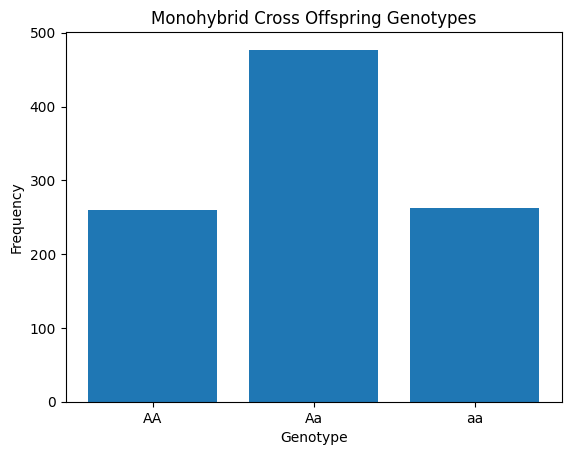

In [2]:
# Function to simulate monohybrid cross
def monohybrid_cross(parent1, parent2, num_offspring):
    offspring = {'AA': 0, 'Aa': 0, 'aa': 0}
    
    for _ in range(num_offspring):
        # Randomly choose one allele from each parent
        allele1 = random.choice(parent1)
        allele2 = random.choice(parent2)
        
        # Combine alleles to form the genotype
        genotype = allele1 + allele2
        genotype = ''.join(sorted(genotype))  # Sort to ensure consistent order (Aa, not aA)
        
        # Count the offspring genotypes
        if genotype == 'AA':
            offspring['AA'] += 1
        elif genotype == 'Aa':
            offspring['Aa'] += 1
        elif genotype == 'aa':
            offspring['aa'] += 1
    
    return offspring

# Parent genotypes (heterozygous)
parent1 = ['A', 'a']
parent2 = ['A', 'a']

# Number of offspring
num_offspring = 1000
offspring = monohybrid_cross(parent1, parent2, num_offspring)

# Display the results
print(f"Offspring Genotypes: {offspring}")

# Plot the results
genotypes = list(offspring.keys())
counts = list(offspring.values())

plt.bar(genotypes, counts)
plt.xlabel('Genotype')
plt.ylabel('Frequency')
plt.title("Monohybrid Cross Offspring Genotypes")
plt.show()

## Advanced Simulation: Multiple Generations
We can simulate inheritance across multiple generations.

In [2]:
import random
from collections import Counter

# Function to simulate a cross
def simulate_cross(parent1, parent2, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        allele1 = random.choice(parent1)
        allele2 = random.choice(parent2)
        offspring.append(allele1 + allele2)
    return offspring

# Simulate a cross between two heterozygous parents (Aa x Aa)
parent1 = 'Aa'
parent2 = 'Aa'
num_offspring = 10000

offspring = simulate_cross(parent1, parent2, num_offspring)

# Count genotypes
genotype_counts = Counter(offspring)
print("Genotype counts:", genotype_counts)

# Calculate probabilities
total_offspring = sum(genotype_counts.values())
genotype_probabilities = {genotype: count / total_offspring for genotype, count in genotype_counts.items()}
print("Genotype probabilities:", genotype_probabilities)

Genotype counts: Counter({'aA': 2597, 'aa': 2524, 'Aa': 2457, 'AA': 2422})
Genotype probabilities: {'AA': 0.2422, 'aa': 0.2524, 'Aa': 0.2457, 'aA': 0.2597}


In [3]:
def simulate_generations(initial_population, num_generations):
    population = initial_population
    for generation in range(num_generations):
        next_population = []
        for parent1 in population:
            for parent2 in population:
                next_population.extend(simulate_cross(parent1, parent2, 1))
        population = random.sample(next_population, len(initial_population))  # Keep population size constant
    return Counter(population)

# Initial population of 100 individuals (heterozygous Aa)
initial_population = ['Aa'] * 100
num_generations = 10

final_population = simulate_generations(initial_population, num_generations)
print("Final genotype distribution after 10 generations:", final_population)

Final genotype distribution after 10 generations: Counter({'AA': 40, 'Aa': 30, 'aA': 18, 'aa': 12})


In [4]:
import random
from collections import Counter

# Function to generate a Punnett square with randomization
def punnett_square(parent1, parent2, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        allele1 = random.choice(parent1)
        allele2 = random.choice(parent2)
        offspring.append(''.join(sorted(allele1 + allele2)))  # Sort alleles for consistent representation
    return Counter(offspring)

# Parent genotypes
parent1 = 'Aa'  # Example: heterozygous parent
parent2 = 'Aa'  # Example: heterozygous parent

# Simulate 1000 offspring
num_offspring = 1000
offspring_distribution = punnett_square(parent1, parent2, num_offspring)

# Display results
print("Genotype distribution:")
for genotype, count in offspring_distribution.items():
    print(f"{genotype}: {count} ({(count / num_offspring) * 100:.2f}%)")

Genotype distribution:
aa: 247 (24.70%)
Aa: 499 (49.90%)
AA: 254 (25.40%)


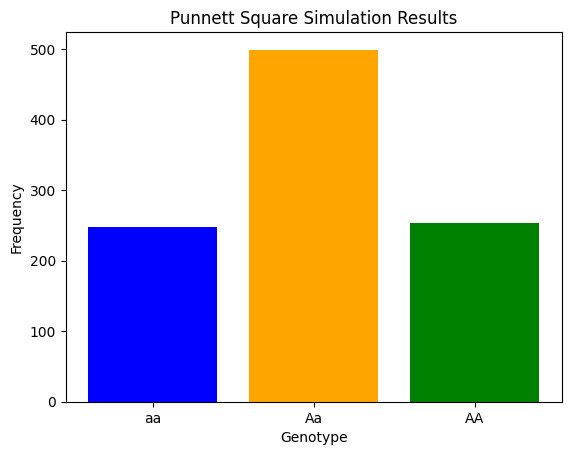

In [5]:
import matplotlib.pyplot as plt

# Function to visualize genotype distribution
def plot_distribution(offspring_distribution):
    genotypes = list(offspring_distribution.keys())
    frequencies = list(offspring_distribution.values())
    
    plt.bar(genotypes, frequencies, color=['blue', 'orange', 'green'])
    plt.xlabel("Genotype")
    plt.ylabel("Frequency")
    plt.title("Punnett Square Simulation Results")
    plt.show()

# Plot the distribution
plot_distribution(offspring_distribution)

In [6]:
# Function to simulate dihybrid cross
def dihybrid_cross(parent1, parent2, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        alleles1 = [random.choice(parent1[:2]), random.choice(parent1[2:])]
        alleles2 = [random.choice(parent2[:2]), random.choice(parent2[2:])]
        genotype = ''.join(sorted(alleles1 + alleles2))
        offspring.append(genotype)
    return Counter(offspring)

# Parent genotypes for dihybrid cross
parent1 = 'AaBb'
parent2 = 'AaBb'

# Simulate 1000 offspring
offspring_distribution_dihybrid = dihybrid_cross(parent1, parent2, num_offspring)

# Display results
print("Dihybrid genotype distribution:")
for genotype, count in offspring_distribution_dihybrid.items():
    print(f"{genotype}: {count} ({(count / num_offspring) * 100:.2f}%)")

Dihybrid genotype distribution:
aabb: 75 (7.50%)
ABab: 255 (25.50%)
AAbb: 51 (5.10%)
Aabb: 120 (12.00%)
ABBa: 133 (13.30%)
AABb: 111 (11.10%)
Baab: 115 (11.50%)
AABB: 75 (7.50%)
BBaa: 65 (6.50%)
